# Task
Load the Iris dataset from '/content/iris.data.csv', perform initial data exploration, clean and preprocess the data (including encoding the categorical target variable), split it into training and testing sets, train a classification model, evaluate its performance visualizing results with legends, and finally summarize the entire process and insights gained.

## Load Data

### Subtask:
Load the Iris dataset from the '/content/iris.data.csv' file into a pandas DataFrame.


**Reasoning**:
First, I'll import the pandas library, then load the specified CSV file into a DataFrame named 'iris_df', and finally display its first few rows to confirm successful loading.



In [1]:
import pandas as pd

iris_df = pd.read_csv('/content/iris.data.csv', header=None)
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Initial Data Exploration

### Subtask:
Perform initial data exploration to understand the structure, data types, and basic statistics of the dataset. Identify features and the target variable (species).


**Reasoning**:
I will perform initial data exploration by displaying column information, descriptive statistics, renaming columns for clarity, and then showing the head of the DataFrame to confirm the changes.



In [2]:
print("DataFrame Info:")
iris_df.info()

print("\nDescriptive Statistics:")
iris_df.describe()

# Rename columns
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print("\nDataFrame after renaming columns:")
iris_df.head()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Descriptive Statistics:

DataFrame after renaming columns:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning and Preprocessing

### Subtask:
Check for and handle any missing values. Encode the categorical target variable (species) into a numerical format suitable for machine learning models.


**Reasoning**:
First, I will check for any missing values in the DataFrame to ensure data quality before proceeding with encoding. Then, I will import `LabelEncoder` from `sklearn.preprocessing`, initialize it, and apply it to the 'species' column to convert the categorical variable into numerical format.



In [3]:
print("Missing values per column:")
print(iris_df.isnull().sum())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['species_encoded'] = le.fit_transform(iris_df['species'])

print("\nOriginal species and their encoded values:")
print(iris_df[['species', 'species_encoded']].drop_duplicates().sort_values(by='species_encoded'))
print("\nDataFrame after encoding:")
iris_df.head()

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Original species and their encoded values:
             species  species_encoded
0        Iris-setosa                0
50   Iris-versicolor                1
100   Iris-virginica                2

DataFrame after encoding:


,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Split Data

### Subtask:
Split the preprocessed dataset into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
I will define the features (X) and target variable (y), then use `train_test_split` from `sklearn.model_selection` to split the data into training and testing sets with a test size of 0.3 and a random state of 42 for reproducibility.



In [4]:
from sklearn.model_selection import train_test_split

X = iris_df.drop(['species', 'species_encoded'], axis=1)
y = iris_df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


## Train Model

### Subtask:
Train a classification model (e.g., Logistic Regression or K-Nearest Neighbors) on the training data.


**Reasoning**:
I will import `LogisticRegression` from `sklearn.linear_model`, instantiate it with a `random_state` for reproducibility, and then train the model using the `X_train` and `y_train` datasets.



In [5]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for better convergence with small datasets

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Evaluate Model and Visualize Results

### Subtask:
Evaluate the trained model's performance on the test data using appropriate metrics like accuracy, precision, recall, and F1-score. Visualize the results, for example, by plotting a confusion matrix and ensuring all plots include legends.


**Reasoning**:
I will make predictions on the test set, then calculate and print the accuracy and classification report. After that, I will generate and plot the confusion matrix using seaborn and matplotlib to visualize the model's performance, ensuring all plots include legends and proper labeling.




Model Accuracy: 0.9778

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



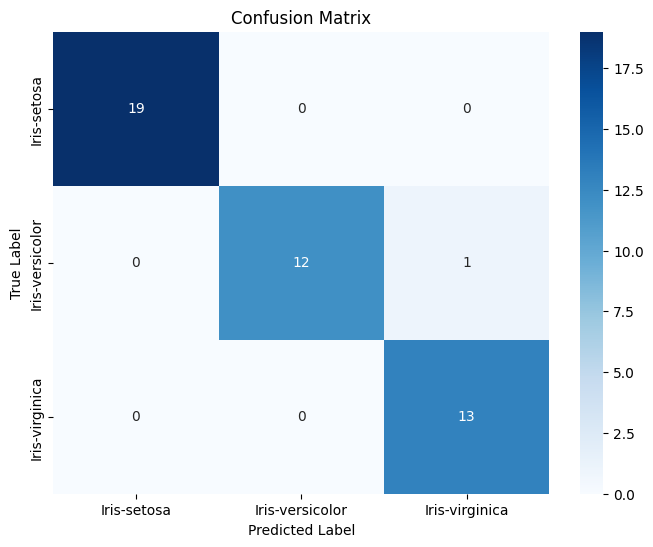

In [6]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# 4. Generate and print a classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Generate the confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 7. Create a list of class labels
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# 8. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Final Task

### Subtask:
Summarize the entire process, including data cleaning steps, the chosen model, its performance, and any insights gained from the evaluation.


## Summary:

### Data Analysis Key Findings
*   The Iris dataset, comprising 150 entries and 5 columns, was successfully loaded. Initial exploration confirmed no missing values, with four numerical features and one categorical target variable (`species`).
*   Columns were renamed to `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, and `species` for clarity.
*   The categorical `species` variable was encoded into a numerical format, with 'Iris-setosa' mapped to 0, 'Iris-versicolor' to 1, and 'Iris-virginica' to 2.
*   The dataset was split into training (105 samples) and testing (45 samples) sets, maintaining a 70/30 ratio respectively.
*   A Logistic Regression model was trained on the preprocessed training data.
*   The model achieved a high accuracy of approximately 97.78% on the test set.
*   Detailed evaluation using a classification report showed excellent performance for 'Iris-setosa' (precision, recall, F1-score of 1.00). For 'Iris-versicolor', precision was 1.00, recall was 0.92, and F1-score was 0.96. For 'Iris-virginica', precision was 0.93, recall was 1.00, and F1-score was 0.96.
*   The confusion matrix indicated only one misclassification: one instance of 'Iris-versicolor' was incorrectly predicted as 'Iris-virginica'.

### Insights or Next Steps
*   The Logistic Regression model performs exceptionally well on the Iris dataset, achieving high accuracy and near-perfect classification for two out of three species.
*   Further analysis could explore why the single misclassification occurred between 'Iris-versicolor' and 'Iris-virginica', potentially examining feature overlap between these two species, or investigating other classification models like Support Vector Machines or Random Forests to see if they can resolve this specific misclassification.
